In [1]:
import numpy as np

In [2]:
%env JAX_ENABLE_X64=True

env: JAX_ENABLE_X64=True


In [3]:
from lenstronomy.LensModel.lens_model import LensModel
import lensinggw.constants.constants as const
from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
from wolensing.plot.plot import plot_contour
import wolensing.amplification_factor.amplification_factor as af

The macroimage where the microlens is placed around.

In [5]:
type2 = False

In [6]:
ym = 0.5
angle = np.radians(float(0))
angle1 = np.radians(float(250))
angle2 = np.radians(float(120))

Importing constants

In [7]:
G = const.G  # gravitational constant [m^3 kg^-1 s^-2]
c = const.c  # speed of light [m/s]
M_sun = const.M_sun  # Solar mass [Kg]

In [8]:
y0, y1 = 0.5, 0 # source position
l0, l1 = 0., 0 # lens position

zS = 1.0 # source redshift
zL = 0.5 # lens redshift

In [9]:
mL1 = 1 * 1e10
mL2 = 1
mL4 = 10
mL5 = 5
mtot = mL1 + mL2

# convert to radians
from lensinggw.utils.utils import param_processing
thetaE1 = param_processing(zL, zS, mL1)
thetaE2 = param_processing(zL, zS, mL2)
thetaE4 = param_processing(zL, zS, mL4)
thetaE5 = param_processing(zL, zS, mL5)

thetaE = param_processing(zL, zS, mtot)

In [10]:
beta0, beta1 = y0 * thetaE, y1 * thetaE
eta10, eta11 = 0 * l0 * thetaE, 0 * l1 * thetaE
lens_model_list = ['SIS']
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE1}
kwargs_lens_list = [kwargs_sis_1]

kwargs_sis_1_scaled = {'center_x': eta10 / thetaE, 'center_y': eta11 / thetaE, 'theta_E': thetaE1 / thetaE}
kwargs_lens_list_scaled = [kwargs_sis_1_scaled]

from lensinggw.solver.images import microimages
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.LensModel.lens_model import LensModel

lensmodel = LensModel(lens_model_list=lens_model_list)

solver = LensEquationSolver(
    lensModel = lensmodel
)

Img_ra, Img_dec = solver.image_position_stochastic(
    source_x = beta0, 
    source_y = beta1,
    kwargs_lens = kwargs_lens_list,
    search_window = 5 * thetaE1,
    x_center = 0,
    y_center=0
)
# solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
#                  'SearchWindow': 5 * thetaE2,
#                  'OverlapDistMacro': 1e-17,
#                  'OnlyMacro': True}
# MacroImg_ra, MacroImg_dec, pixel_width = microimages(source_pos_x=beta0,
#                                                      source_pos_y=beta1,
#                                                      lens_model_list=lens_model_list,
#                                                      kwargs_lens=kwargs_lens_list,
#                                                      **solver_kwargs)

# Td = TimeDelay(MacroImg_ra, MacroImg_dec,
#                 beta0, beta1,
#                 zL, zS,
#                 lens_model_list, kwargs_lens_list)
# Mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)

/home/manchun.yeung/.conda/envs/wolensing/lib/python3.8/site-packages/lensinggw-1.0.0-py3.8.egg/lensinggw/solver/images.py:107: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.8/site-packages/lensinggw-1.0.0-py3.8.egg/lensinggw/solver/images.py:107: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.8/site-packages/lensinggw-1.0.0-py3.8.egg/lensinggw/solver/images.py:108: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.8/site-packages/lensinggw-1.0.0-py3.8.egg/lensinggw/solver/images.py:117: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.8/site-packages/lensinggw-1.0.0-py3.8.egg/lensinggw/solver/images.py:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.8/site-packages/lensing

In [11]:
Img_ra, Img_dec

(array([1.20793321e-06]), array([2.7821891e-21]))

In [12]:
beta0, beta1 = y0 * thetaE, y1 * thetaE
eta10, eta11 = 0 * l0 * thetaE, 0 * l1 * thetaE
lens_model_list = ['SIS']
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE1}
kwargs_lens_list = [kwargs_sis_1]

kwargs_sis_1_scaled = {'center_x': eta10 / thetaE, 'center_y': eta11 / thetaE, 'theta_E': thetaE1 / thetaE}
kwargs_lens_list_scaled = [kwargs_sis_1_scaled]

from lensinggw.solver.images import microimages
solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
                 'SearchWindow': 5 * thetaE2,
                 'OverlapDistMacro': 1e-17,
                 'OnlyMacro': True}
MacroImg_ra, MacroImg_dec, pixel_width = microimages(source_pos_x=beta0,
                                                     source_pos_y=beta1,
                                                     lens_model_list=lens_model_list,
                                                     kwargs_lens=kwargs_lens_list,
                                                     **solver_kwargs)

Td = TimeDelay(MacroImg_ra, MacroImg_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)
Mus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)
if type2:
    microtype = np.nonzero(Td)[0][0]
else:
    microtype = np.where(Td==0)[0][0]
    



---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro         --> True
Scaled            --> False
SearchWindowMacro --> 8.05288806158241e-06
PixelsMacro       --> 1000
PrecisionLimit    --> 1e-20
OverlapDistMacro  --> 1e-17
NearSource        --> False
Optimization      --> False
Verbose           --> False




MACROIMAGES

ra: [-4.02644403e-07  1.20793321e-06]
dec: [4.23516474e-22 4.23516474e-22]



In [13]:
lensmodel = LensModel(lens_model_list=lens_model_list)

solver = LensEquationSolver(
    lensModel = lensmodel
)
min_distance = [float(10*thetaE1/1000), 1]
S_ra, S_dec, dm, dt = solver.candidate_solutions(
    sourcePos_x = beta0,
    sourcePos_y = beta1,
    kwargs_lens = kwargs_lens_list,
    min_distance = 8.05288806158241e-09,
    search_window = 10 * thetaE1,
    x_center = 0.,
    y_center= 0.,
    verbose=False
)

In [14]:
masses=[0.0875411729158816, 0.1380156891218021, 0.37757290272476596, 0.08326002905591416, 0.11751088559578819, 0.0878737809276154, 0.14164220540181344, 0.32080191454865087, 0.1432894584167837, 0.2607705005317567, 0.09098854113286821, 0.636857294268748, 0.10244447554800015, 0.11147041258795794, 0.2124085350914183, 0.6266784519859449, 0.42496685401191886, 1.1390594002155605, 0.4254607239653152, 0.1671246164756932, 0.17585315448008126, 0.36911502207552227]

In [15]:
num_points = len(masses)

angle = np.random.uniform(0, 2*np.pi, size=num_points)
ym = np.random.uniform(0, 2, size=num_points)

thetaEl = []
eta20, eta21 = [], []

for j in range(0,num_points):
    thetaEl.append(param_processing(zL, zS, masses[j]))# lens model
    #positioning the microlenses
    eta20.append(MacroImg_ra[microtype] + ym[j]*np.cos(angle[j]) * thetaEl[j])
    eta21.append(MacroImg_dec[microtype] + ym[j] * np.sin(angle[j]) * thetaEl[j])
    lens_model_list.append('POINT_MASS')
    kwargs_lens_list.append({'center_x': eta20[j], 'center_y': eta21[j], 'theta_E': thetaEl[j]})
    
from lensinggw.solver.images import microimages
solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
                 'SearchWindow': 10 * thetaE4,
                 'Pixels': 1e3,
                 'OverlapDist': 1e-18,
                 'OverlapDistMacro': 1e-17}
solver_kwargs.update({'Improvement' : 0.1})
solver_kwargs.update({'MinDist' : 10**(-17)})

lensmodel = LensModel(lens_model_list=lens_model_list)

solver = LensEquationSolver(
    lensModel = lensmodel
)

Img_ra, Img_dec = solver.image_position_stochastic(
    source_x = beta0, 
    source_y = beta1,
    kwargs_lens = kwargs_lens_list,
    search_window = 10 * thetaE4,
    precision_limit=10**(-17),
    x_center = MacroImg_ra[microtype],
    y_center= MacroImg_dec[microtype],
)

In [16]:
Img_ra, Img_dec

(array([1.20793290e-06, 1.20793239e-06, 1.20791346e-06, 1.20795397e-06,
        1.20793253e-06, 1.20793511e-06]),
 array([ 3.40142066e-11, -3.54491374e-11, -1.43884756e-12, -3.57527884e-12,
         1.48026338e-12, -3.20721254e-13]))

In [17]:
Images_dict = {'Source_ra': beta0,
               'Source_dec': beta1,
               'Img_ra': Img_ra,
               'Img_dec': Img_dec,
               'MacroImg_ra': MacroImg_ra,
               'MacroImg_dec': MacroImg_dec,
               'Microlens_ra': [eta20],
               'Microlens_dec': [eta21],
               'thetaE': thetaE}

# time delays, magnifications, Morse indices 
from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification
tds = TimeDelay(Img_ra, Img_dec,
               beta0, beta1,
               zL, zS,
               lens_model_list, kwargs_lens_list)
mus = magnifications(Img_ra, Img_dec, lens_model_list, kwargs_lens_list)
ns = getMinMaxSaddle(Img_ra, Img_dec, lens_model_list, kwargs_lens_list, diff = None)
print('Time delays (seconds): ', tds)
print('magnifications: ', mus)
print('Morse indices: ', ns)
    
lens_model_complete = LensModel(lens_model_list=lens_model_list)
T = lens_model_complete.fermat_potential
T0 = thetaE ** (-2) * T(MacroImg_ra[microtype], MacroImg_dec[microtype], kwargs_lens_list, beta0, beta1)#[0]
if not isinstance(T0, float):
    T0 = T0[0]
Tscale = 4 * (1 + zL) * mtot * M_sun * G / c ** 3
print('T0 = {}'.format(T0))
print('Tscale = {}'.format(Tscale))

Time delays (seconds):  [0.00000000e+00 1.62184588e-05 1.01462356e-04 1.21627992e-04
 2.69471959e-04 2.91256467e-04]
magnifications:  [ 2.25216764e+00  2.26381144e+00 -7.54049161e-01 -6.44630894e-01
 -4.18566397e-04 -3.62299288e-04]
Morse indices:  [0, 0, 0, 0.5, 0.5, 0.5]
T0 = -0.9999999836942552
Tscale = 295529.46156216745


In [18]:
# # Injecting microlens around desired macroimage
# eta20, eta21 = MacroImg_ra[microtype] + np.cos(angle)*ym*thetaE2, MacroImg_dec[microtype] + np.sin(angle)*ym*thetaE2
# eta40, eta41 = MacroImg_ra[microtype] + np.cos(angle1)*1.7*thetaE4, MacroImg_dec[microtype] + np.sin(angle1)*0.7*thetaE4
# eta50, eta51 = MacroImg_ra[microtype] + np.cos(angle2)*2.5*thetaE5, MacroImg_dec[microtype] + np.sin(angle2)*2.5*thetaE5


# lens_model_list = ['SIS', 'POINT_MASS', 'POINT_MASS', 'POINT_MASS']
# kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE1}
# kwargs_point_mass_2 = {'center_x': eta20, 'center_y': eta21, 'theta_E': thetaE2}
# kwargs_point_mass_4 = {'center_x': eta40, 'center_y': eta41, 'theta_E': thetaE4}
# kwargs_point_mass_5 = {'center_x': eta50, 'center_y': eta51, 'theta_E': thetaE5}
# kwargs_lens_list = [kwargs_sis_1, kwargs_point_mass_2, kwargs_point_mass_4, kwargs_point_mass_5]

# from lensinggw.solver.images import microimages
# solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
#                  'SearchWindow': 10 * thetaE4,
#                  'Pixels': 1e3,
#                  'OverlapDist': 1e-18,
#                  'OverlapDistMacro': 1e-17}
# solver_kwargs.update({'Improvement' : 0.1})
# solver_kwargs.update({'MinDist' : 10**(-17)})

# lensmodel = LensModel(lens_model_list=lens_model_list)

# solver = LensEquationSolver(
#     lensModel = lensmodel
# )

# Img_ra, Img_dec = solver.image_position_stochastic(
#     source_x = beta0, 
#     source_y = beta1,
#     kwargs_lens = kwargs_lens_list,
#     search_window = 10 * thetaE4,
#     precision_limit=10**(-17),
#     x_center = MacroImg_ra[1],
#     y_center= MacroImg_dec[1],
# )

# # Img_ra, Img_dec, MacroImg_ra, MacroImg_dec, pixel_width = microimages(source_pos_x=beta0,
# #                                                                       source_pos_y=beta1,
# #                                                                       lens_model_list=lens_model_list,
# #                                                                       kwargs_lens=kwargs_lens_list,
# #                                                                       **solver_kwargs)

# Images_dict = {'Source_ra': beta0,
#                'Source_dec': beta1,
#                'Img_ra': Img_ra,
#                'Img_dec': Img_dec,
#                'MacroImg_ra': MacroImg_ra,
#                'MacroImg_dec': MacroImg_dec,
#                'Microlens_ra': [eta20],
#                'Microlens_dec': [eta21],
#                'thetaE': thetaE}

# # time delays, magnifications, Morse indices 
# from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
# from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification
# tds = TimeDelay(Img_ra, Img_dec,
#                beta0, beta1,
#                zL, zS,
#                lens_model_list, kwargs_lens_list)
# mus = magnifications(Img_ra, Img_dec, lens_model_list, kwargs_lens_list)
# ns = getMinMaxSaddle(Img_ra, Img_dec, lens_model_list, kwargs_lens_list, diff = None)
# print('Time delays (seconds): ', tds)
# print('magnifications: ', mus)
# print('Morse indices: ', ns)
    
# lens_model_complete = LensModel(lens_model_list=lens_model_list)
# T = lens_model_complete.fermat_potential
# T0 = thetaE ** (-2) * T(MacroImg_ra[microtype], MacroImg_dec[microtype], kwargs_lens_list, beta0, beta1)#[0]
# if not isinstance(T0, float):
#     T0 = T0[0]
# Tscale = 4 * (1 + zL) * mtot * M_sun * G / c ** 3
# print('T0 = {}'.format(T0))
# print('Tscale = {}'.format(Tscale))

In [19]:
# plot only the microimages around the desired macroimage
# Img_ra = np.delete(Img_ra, [0])
# Img_dec = np.delete(Img_dec, [0])

[-4.02644403e-07  1.20793321e-06] [4.23516474e-22 4.23516474e-22] Img_pos


<AxesSubplot:>

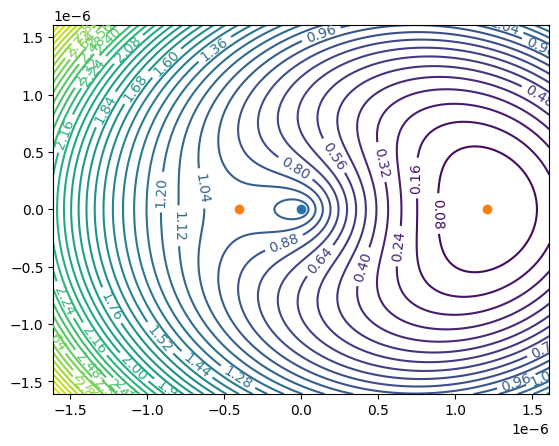

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot_contour(ax, lens_model_list, eta10, eta11, 4*thetaE1, kwargs_lens_list, beta0, beta1, MacroImg_ra, MacroImg_dec,
                    T0 = T0, Tfac = (thetaE)**(-2), micro=False)


[1.20793290e-06 1.20793239e-06 1.20791346e-06 1.20795397e-06
 1.20793253e-06 1.20793511e-06] [ 3.40142066e-11 -3.54491374e-11 -1.43884756e-12 -3.57527884e-12
  1.48026338e-12 -3.20721254e-13] Img_pos


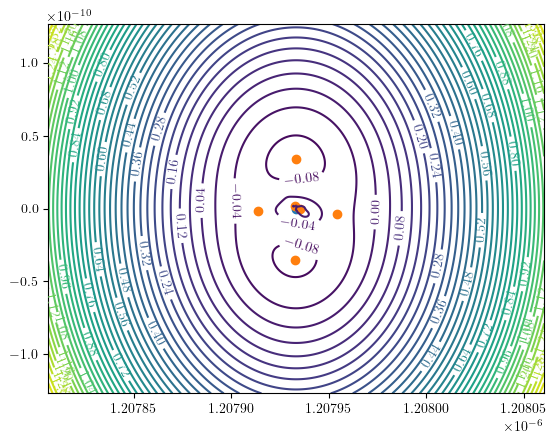

In [31]:
fig1, ax1 = plt.subplots()
ax2 = plot_contour(ax1, lens_model_list, MacroImg_ra[microtype], MacroImg_dec[microtype], 10*thetaE4, kwargs_lens_list, beta0, beta1, Img_ra, Img_dec,
                    T0 = T0, Tfac = (thetaE)**(-2), micro=True)
# plt.savefig('0d.png')

In [22]:
# Define the characteristic WindowSize
mL3 = 10
thetaE3 = param_processing(zL, zS, mL3)

In [23]:
import time

start


Integrating...: 100%|██████████| 121/121 [10:28<00:00,  5.20s/it]


total time 11.999999999999998


<Figure size 640x480 with 0 Axes>

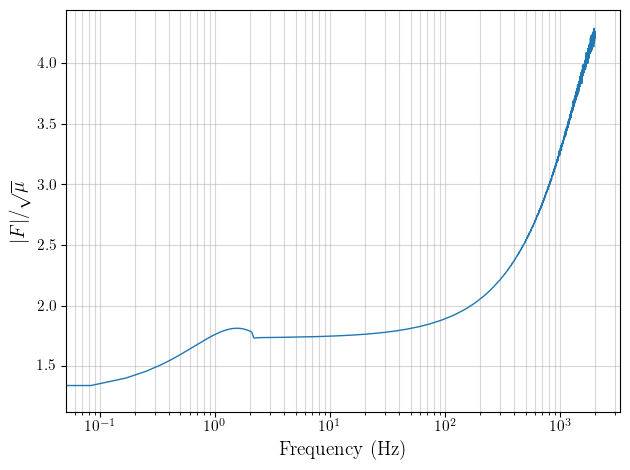

<AxesSubplot:xlabel='Frequency (Hz)', ylabel='$|F|/\\sqrt{\\mu}$'>

In [24]:
kwargs_macro = {'source_pos_x': beta0,
                'source_pos_y': beta1,
                'theta_E': thetaE,
                'mu': Mus[microtype],
               }

kwargs_integrator = {'PixelNum': int(20000),
                     'PixelBlockMax': 2000,
                     'WindowSize': 1.5*210*thetaE3,
                     'WindowCenterX': MacroImg_ra[microtype],
                     'WindowCenterY': MacroImg_dec[microtype],
                     'T0': T0,
                     'TimeStep': 1e-5/Tscale, 
                     'TimeMax': T0 + 1/Tscale,
                     'TimeMin': T0 - .1/Tscale,
                     'TimeLength': 2/Tscale,
                     'TExtend': 10/Tscale,
                     'LastImageT': .02/Tscale,
                     'Tbuffer': 0,
                     'Tscale': Tscale}


amplification = af.amplification_factor(lens_model_list=lens_model_list, kwargs_lens=kwargs_lens_list, kwargs_macro=kwargs_macro, **kwargs_integrator)
amplification.integrator(gpu=False)
ws, Fws = amplification.fourier()
amplification.plot_freq()

<Figure size 640x480 with 0 Axes>

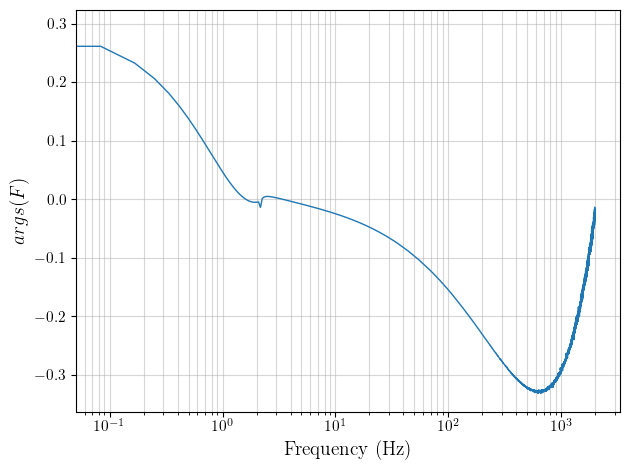

<AxesSubplot:xlabel='Frequency (Hz)', ylabel='$args(F)$'>

In [25]:
amplification.plot_freq(pha=True)

<Figure size 640x480 with 0 Axes>

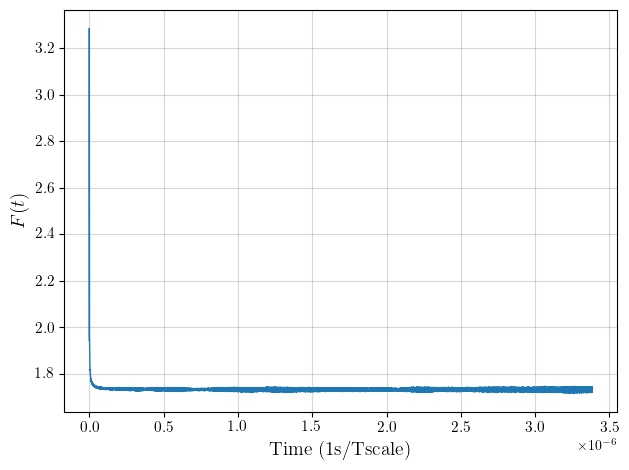

<AxesSubplot:xlabel='Time (1s/Tscale)', ylabel='$F(t)$'>

In [26]:
amplification.plot_time()

# Geometrical optics
To get the geometrical optics around type 1 image, we need the magnifications, time delay and the image positions of the microimages

In [27]:
# mus = mus[1:]
# tds = tds[1:]

In [30]:
mus, Img_ra, Img_dec, tds

(array([ 2.25216764e+00,  2.26381144e+00, -7.54049161e-01, -6.44630894e-01,
        -4.18566397e-04, -3.62299288e-04]),
 array([1.20793290e-06, 1.20793239e-06, 1.20791346e-06, 1.20795397e-06,
        1.20793253e-06, 1.20793511e-06]),
 array([ 3.40142066e-11, -3.54491374e-11, -1.43884756e-12, -3.57527884e-12,
         1.48026338e-12, -3.20721254e-13]),
 array([0.00000000e+00, 1.62184588e-05, 1.01462356e-04, 1.21627992e-04,
        2.69471959e-04, 2.91256467e-04]))

In [29]:
geofs, geoFws = amplification.geometrical_optics(mus, tds, Img_ra, Img_dec)

NameError: name 'warnings' is not defined

In [ ]:
plt.semilogx(geofs, np.abs(geoFws))

In [ ]:
plt.semilogx(geofs, np.angle(geoFws))

# Full amplification factor concatenated with geometrical optics
Given the computaional cost of the diffraction integral, we concatenate the result of wave optics at low frequency and geometrical optics at high frequency to obtain a full amplification factor with default upper bound of 3000Hz.

In [ ]:
fullfs, fullFws = amplification.concatenate()
plt.semilogx(fullfs, np.abs(fullFws))

In [ ]:
plt.semilogx(fullfs, np.angle(fullFws))

In [ ]:
ww = geofs
plt.semilogx(geofs, (np.sqrt(3)*np.exp(-ww*np.pi/2000) + (1-np.exp(-ww*np.pi/2000))*np.abs(geoFws))/np.sqrt(3), label='approx')
plt.semilogx(geofs, np.abs(geoFws)/np.sqrt(3), label='Fgeo')
plt.semilogx(ws, np.abs(Fws)/np.sqrt(3), label='Fwave')
plt.legend()
# plt.savefig('./two_microlens_200_50_0d.jpg',bbox_inches='tight')

In [ ]:
plt.semilogx(geofs, (1e-5*np.exp(-ww*np.pi/100) + (1-np.exp(-ww*np.pi/100))*np.angle(geoFws)), label='approx')
plt.semilogx(geofs, np.angle(geoFws), label='Fgeo')
plt.semilogx(ws, np.angle(Fws), label='Fwave')

In [ ]:
Mus[microtype]

In [ ]:
amplification.plot_freq()

In [ ]:
amplification.plot_freq(smooth=False)

In [ ]:
plt.plot(ws[:720], np.abs(Fws[:720])/np.sqrt(3))